In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
%run beautify_plots.py

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import neural_net_helper
%aimport neural_net_helper

nnh = neural_net_helper.NN_Helper()

# Activation Layers

Consider a sequence of layers
- Each layer performing a dot product
- With **no* activation function (or equivalently one that is the identity function)

A dot product is equivalent to a linear transformation (e.g, matrix multiplication).
- A sequence of dot products can be re-written as a matrix multiplication
- Involving the product of the individual matrices

That is: the composition of linear functions is just a linear function.

Thus, the layer architecture would have no real purpose *without* the non-linear activation functionss.

Let's examine the sigmoid activation function

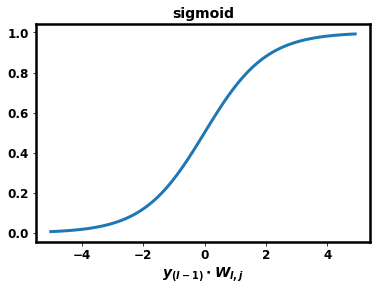

In [5]:
_= nnh.sigmoid_fn_plot()

A binary switch would
- Output a $1$ if the dot product exceeded a *threshold* ($0$ in the above plot)
- Output a $0$ otherwise

The sigmoid is an approximation of the binary switch.
- Maps most values of the dot product to $0$ or $1$
- This is why it was useful for binary classification


It almost acts as a True/False gate for the question: "Does $\y_{(\ll-1)}$ have some particular feature ?"

The ability to turn a continuous value into a (near) discrete binary choice is the power of the non-linearity.


The signmod is not the only choice for a non-linear activation function.

Let's examine some others, along with their derivatives

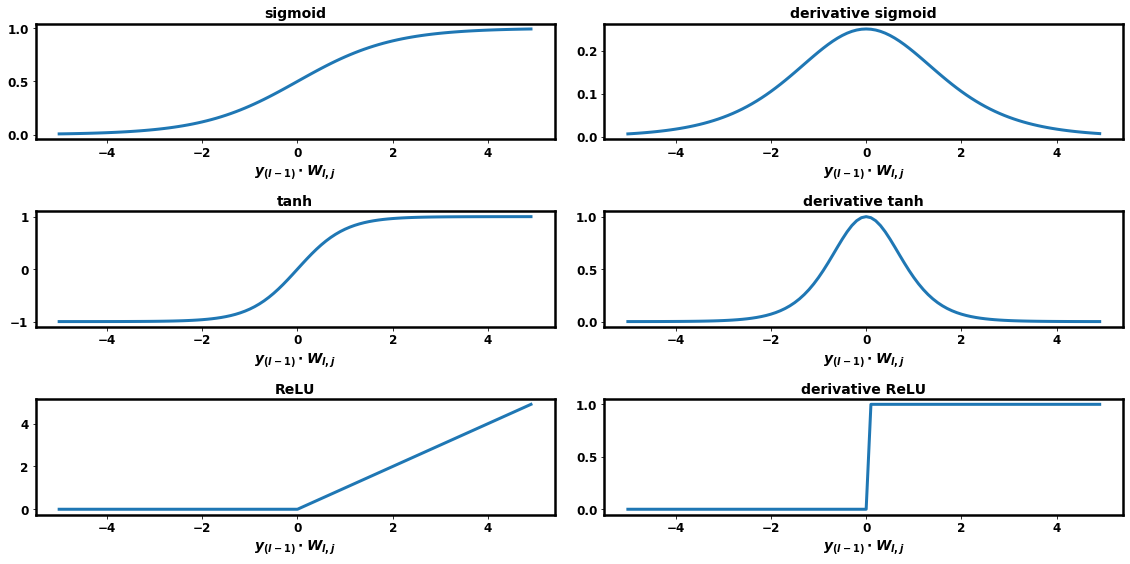

In [8]:
fig, _ = nnh.plot_activations( np.arange(-5,5, 0.1) )

The first thing to note is the different output ranges.

The particular task might dictate the Activation function for the final layer
- the range of tanh is $[-1,+1]$ which may be appropriate for $0$ centered outputs
- the range of sigmoid is $[0,1]$, which may be appropriate for
    - binary classifiers, or neurons that act as "gates" (on/off switches)
    - outputs that need to be in this range, such as probabilities
- **No** activation might be the right choice for a Regression task (unbounded output range)

Although it is hard to appreciate at the moment
- Managing derivatives is
**one of the key** insights that enabled the explosive growth of DL !

We will explore this more in a subsequent lecture; for now:
- A zero derivative can hamper learning that uses Gradient Descent (tanh, sigmoid)
- The magnitude of the derivative modulates the "error signal" during back propagation
    - so smaller maximum values diminish the signal more than larger ones (sigmoid)


The other thing to notice are the derivatives:
- both the tanh and sigmoid have large regions, at either tail, of near zero derivatives

- the derivative of the sigmoid has a maximum value of about 0.25


In most cases, we will use the ReLU activation function.
- Half of the domain results in a non-zero derivative, which facilitates learning

As a refresher: here is what the ReLU function looks like for various values of $\W$.

First, let's vary $W_1$, the "slope"

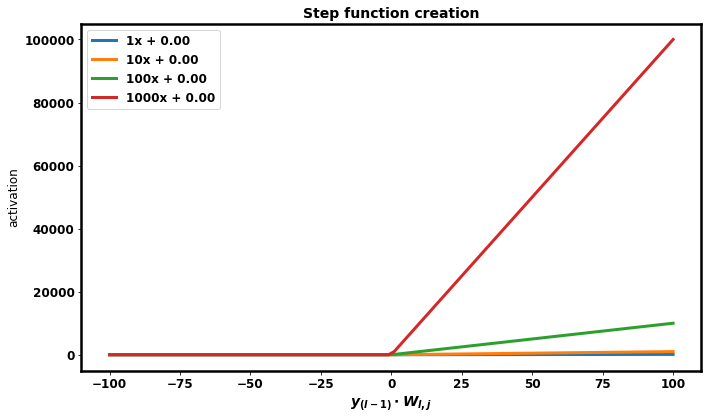

In [9]:
_ = nnh.plot_steps( [ nnh.NN(1,0), nnh.NN(10,0), nnh.NN(100,0), nnh.NN(1000,0), ])

# Varying the threshold: the bias

All of the activation functions approximate a binary switch
- They divide the range of the dot product into two regions: $0$ and non-$0$
- The division is centered around a threshold value of the dot product ($0$)

We will show how to vary the threshold.

By doing so, we can show (see Deep Dive on *Universal Approximation Theorem*)
- How to approximate a function of the dot product
- With aribtrarily complex shape
- Via a piece-wise approximation
    - Each threshold contributes one linear segment

You will often see the equation for unit $j$ of layer $\ll$ written with an extra term $\b_j$
$$\y_{\llp, j} = \y_{(\ll-1)} \cdot \W_{\llp,j} + \b_{\llp,j}$$

$\b_{\llp,j}$ is called the *bias* of unit $j$ of layer $\ll$.

The bias term $\b_{\llp,j}$ seems like an isolated annoyance.

Far from it !

It controls the region at which the activation functions "switches" from $0$ to $1$
$$
(\y_{(\ll-1)} \cdot \W_{\llp,j} + \b_{\llp,j} > 0 ) \text{ when } (\y_{(\ll-1)} \cdot \W_{\llp,j} > -b)
$$


Rather than keeping $\b_{\llp,j}$ apart from the dot product
- We apply a "trick" familiar from the Classical Machine Learning part of the course

- We imagine augmenting input $\y_{(\ll-1)} = [ \y_{(\ll-1),1}, \ldots, \y_{(\ll-1), n_{(\ll-1)} }]$
- With element $\y_{(\ll-1),0} = 1$
- Such that $\y_{(\ll-1)} = [ 1, \y_{(\ll-1),1}, \ldots, \y_{(\ll-1), n_{(\ll-1)} }]$
- Setting $\W_{\llp,j,0} = \b_{\llp,j}$

Thus the dot product
$$
\y_{(\ll-1)} \cdot \W_{\llp,j}
$$

becomes equal to
$$\y_{(\ll-1)} \cdot \W_{\llp,j} + \b_{\llp,j}$$



You can see how varying $\W_0$ (the "intercept") shifts the function left/right

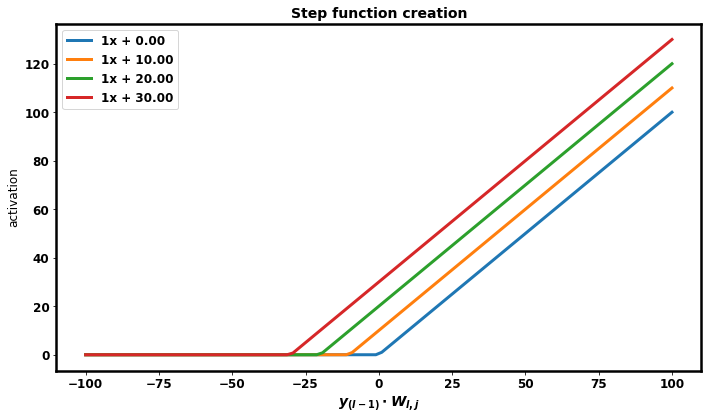

In [10]:
_ = nnh.plot_steps( [ nnh.NN(1,0), nnh.NN(1,10), nnh.NN(1,20), nnh.NN(1,30), ])

## Other activation functionss

### Linear/Identity

### Softmax Layer

### Leaky ReLU Layer

In [ ]:
print("Done")